<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
from scipy.stats import norm

In [36]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BUSHING DIAMETER 2 BATCHES.csv to BUSHING DIAMETER 2 BATCHES.csv
User uploaded file "BUSHING DIAMETER 2 BATCHES.csv" with length 1124 bytes


In [37]:
data = pd.read_csv('BUSHING DIAMETER 2 BATCHES.csv',sep=',', na_values=".")
print(data)

    Batch 1  Batch 2
0     1.001    1.000
1     1.005    1.005
2     1.015    1.015
3     1.020    1.005
4     1.010    0.990
5     1.015    1.005
6     1.000    1.015
7     1.010    1.000
8     0.999    1.005
9     1.010    0.990
10    0.996    0.997
11    1.000    1.000
12    1.004    1.002
13    0.995    1.001
14    1.006    1.006
15    0.985    1.005
16    1.010    1.010
17    1.000    1.015
18    0.995    1.000
19    1.000    1.000
20    1.000    1.015
21    0.999    0.995
22    1.014    1.005
23    1.009    1.010
24    1.005    1.010
25    1.025    1.006
26    1.004    0.999
27    1.004    1.006
28    0.999    1.005
29    1.000    1.001
30    1.014    1.007
31    1.009    0.995
32    0.994    1.007
33    1.009    0.999
34    0.999    1.010
35    1.004    0.991
36    1.009    0.996
37    0.989    1.006
38    1.003    1.019
39    1.009    1.006
40    0.996    1.005
41    0.996    1.005
42    1.000    1.001
43    1.001    1.002
44    1.001    1.017
45    1.001    0.999
46    0.995  

In [38]:
data.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


In [40]:
# 95% confidence interval of one sample variance unknown
# Batch 1
mean1=np.mean(data['Batch 1'])
sigma1=np.std(data['Batch 1'])
scipy.stats.t.interval(0.95, df=49, loc=mean1, scale=sigma1)

(0.9880146482662717, 1.0187053464137283)

In [33]:
# 95% confidence interval of one sample variance unknown
# Batch 2
mean2=np.mean(data['Batch 2'])
sigma2=np.std(data['Batch 2'])
stats.t.interval(0.95, df=49, loc=mean2, scale=sigma2)

(0.9892828480338633, 1.0180371602061364)

(0.0, 20.0)

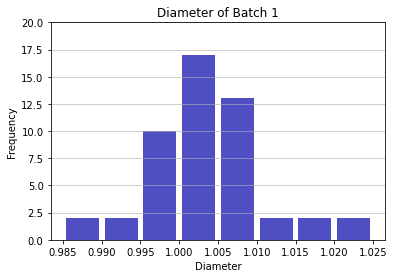

In [28]:
n, bins, patches = plt.hist(x=data['Batch 1'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Diameters of Batch 1')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

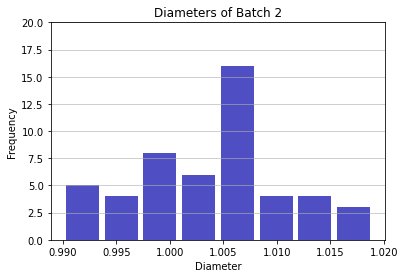

In [29]:
n, bins, patches = plt.hist(x=data['Batch 2'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Diameters of Batch 2')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#F test for variances of two populations

# define a F test
def f_test(x,y):
  x=np.array(x)
  y=np.array(y)
  f=np.var(x,ddof=1)/np.var(y, ddof=1) # cal F test statistic
  dfn=x.size-1
  dfd=y.size-1
  p=1-stats.f.cdf(f,dfn, dfd) #find p-value of F test statistics
  return f, p
  
Batch_1 = data['Batch 1']
Batch_2 = data['Batch 2']
f_test(Batch_1, Batch_2)

(1.1392199163691206, 0.32501448085544293)

P-Value is greater than .05 so fail to reject equal variances, assume variances are equal

In [ ]:
#two sample t-test 1: assume the variance is the same 
Batch_1 = data['Batch 1']
Batch_2 = data['Batch 2']
stats.ttest_ind(Batch_2, Batch_1, equal_var=True)

Ttest_indResult(statistic=0.20069320812014202, pvalue=0.8413543932394967)

The p-value is again greater than .05 so fail to reject the null hypothesis, assume the means are equal and thus the populations are the same. 

Exercise 4.6

In [14]:
#a
a = scipy.stats.t.sf(abs(-2.8), df=24)

#b
b = scipy.stats.t.sf(abs(-1.75), df=24)

#c
c = scipy.stats.t.sf(abs(-2.54), df=24)

#d
d = scipy.stats.t.sf(abs(-2.05), df=24)

print(a,b,c,d)

0.00496459063985459 0.046447544473094404 0.008987349928309575 0.025720976728562817


Exercise 4.11


0.0019976791733343374
Null hyphothesis rejected
13.393154725839862 13.39920527416014


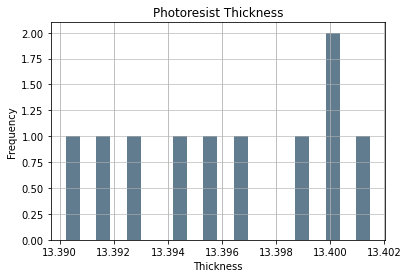

In [35]:
# a
x = [13.3987, 13.3957, 13.3902, 13.4015, 13.4001,
13.3918, 13.3965, 13.3925, 13.3946, 13.4002]
# assuming the variance of VIQ is known and n > 30
ztest ,propability_value = stests.ztest(x, x2=None, value=13.4)
print(float(propability_value))
if propability_value<0.05:
  print("Null hyphothesis rejected")
else:
  print("Cannot reject the Null hyphothesis accepted ")

# b
mean = np.mean(x)
sd = np.std(x)
z_alpha = 2.58
LCI = (mean - z_alpha * (sd/math.sqrt(10)))
UCI = (mean + z_alpha * (sd/math.sqrt(10)))
print(LCI, UCI)


# histogram
size, scale = 1000, 10
commutes = pd.Series(x) 

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Photoresist Thickness')
plt.xlabel('Thickness')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

The null hypothesis is rejected so the mean thickness is not equal to 13.4.

The normality assumption is not reasonable for this data because the data does not graph to be normal. There is also too few observations for the data to be assumed normal. 